# Numerical Integration - Visualizations
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

# 1. Definite Integral
---
$$ \large
f(x)=x^3-4x^2+4x+2
$$

In [3]:
x = np.linspace(0, 3, 1001)
f = lambda x: x**3 - 4*x**2 + 4*x + 2

In [4]:
a = 0.5
b = 2.5
Ax = np.linspace(a, b, 101)
Ay = f(Ax)

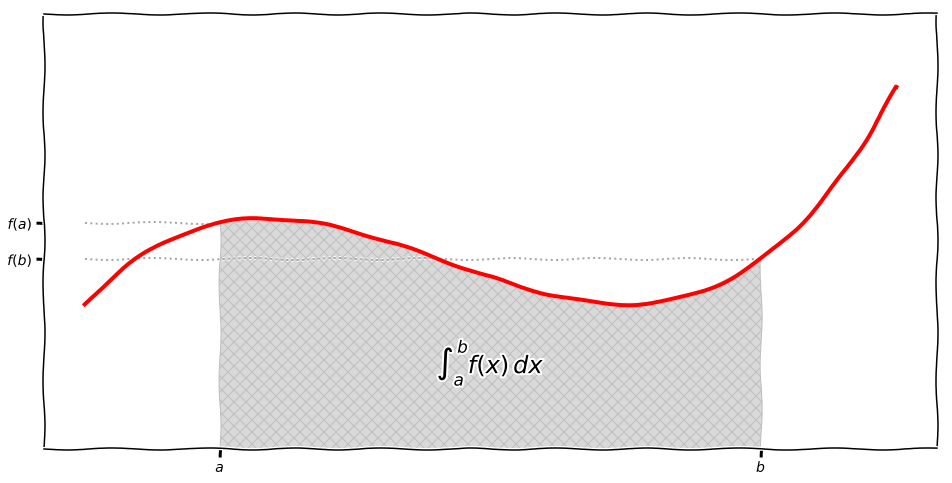

In [5]:
with plt.xkcd():
    fig, ax = plt.subplots()

    plt.plot([0, a], [f(a)]*2, ':', c='black', alpha=0.35)
    plt.plot([0, b], [f(b)]*2, ':', c='black', alpha=0.35)
    plt.plot(x, f(x), c='red', linewidth=4)
    plt.ylim([0, 6])

    verts = [(a, 0), *zip(Ax, Ay), (b, 0)]
    P = Polygon(verts, facecolor='0.85', edgecolor='0.75', hatch='xx')
    ax.add_patch(P)

    plt.text((a + b)/2, f((a + b)/2)/2,
             r'$\int_a^b f(x)\, dx$',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=24)

    ax.set_xticks((a, b))
    ax.set_xticklabels(('$a$', '$b$'))
    ax.set_yticks([f(a), f(b)])
    ax.set_yticklabels(('$f(a)$', '$f(b)$'))

    fig.savefig('output/integration_definite-integral_integration.png', bbox_inches='tight')
plt.show()

$$ \large
I=\int_{a}^{b}f(x) \, dx
 =\int_{a}^{b}(x^3-4x^2+4x+2) \, dx
$$

Given $\large a=\frac{1}{2}$ and $\large b=\frac{5}{2}$,

$$ \large
I=\left.\left(\frac{x^4}{4}-\frac{4x^3}{3}+2x^2+2x\right)\right|_a^b = \frac{61}{12} \approx 5.0833
$$

In [6]:
I = 61/12

## 1.1. Rectangle rule
---

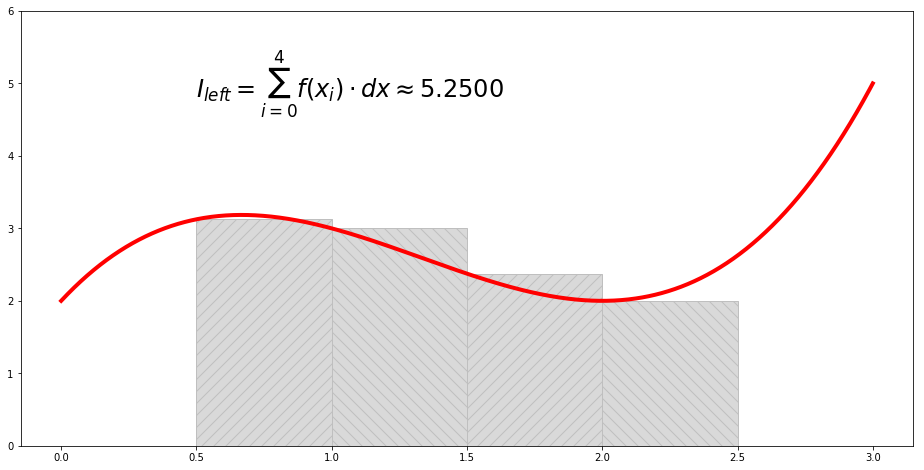

In [7]:
def defInt_left(f, a, b, N):
    result = 0; FX = []; Xn = []
    dx = abs(b - a)/N
    while a < b:
        result += f(a)*dx
        FX += [f(a)]
        Xn += [a]
        a += dx
    return result, FX, Xn, dx

N = 4
I_left, FX, Xn, dx = defInt_left(f, a, b, N)

fig, ax = plt.subplots()
plt.plot(x, f(x), c='red', linewidth=4)
plt.ylim([0, 6])

for i, [fxi, xi] in enumerate(zip(FX, Xn)):
    verts = [(xi, 0), (xi, fxi), (xi + dx, fxi), (xi + dx, 0)]
    P = Polygon(verts, facecolor='0.85', edgecolor='0.75', hatch=['//', '\\\\'][i % 2])
    ax.add_patch(P)

plt.text(a, 5,
         r'$I_{0}left{1}=\sum_{0}i=0{1}^{0}{3}{1} f(x_i) \cdot dx \approx {2:.4f}$'.format('{', '}', I_left, N),
         horizontalalignment='left',
         verticalalignment='center',
         fontsize=24)
fig.savefig('output/integration_definite-integral_rectangleLeft.png', bbox_inches='tight')
plt.show()

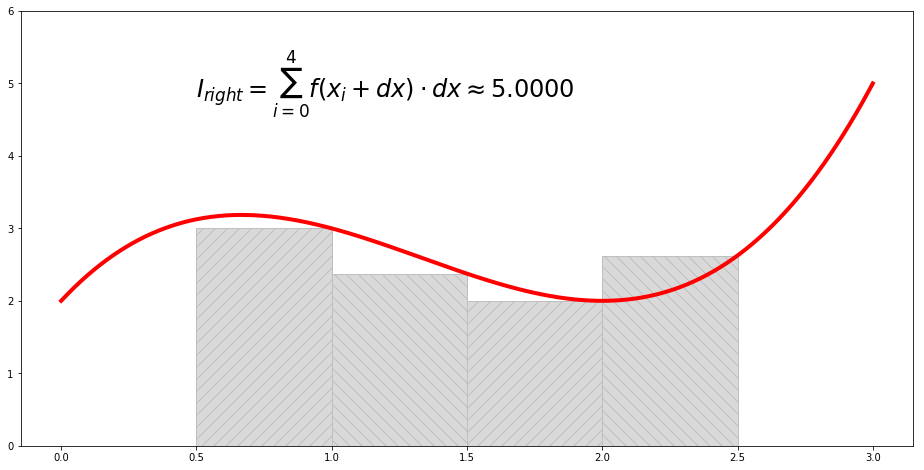

In [8]:
def defInt_right(f, a, b, N):
    result = 0; FX = []; Xn = []
    dx = abs(b - a)/N
    while a < b:
        result += f(a + dx)*dx
        FX += [f(a + dx)]
        Xn += [a]
        a += dx
    return result, FX, Xn, dx

N = 4
I_right, FX, Xn, dx = defInt_right(f, a, b, N)

fig, ax = plt.subplots()
plt.plot(x, f(x), c='red', linewidth=4)
plt.ylim([0, 6])

for i, [fxi, xi] in enumerate(zip(FX, Xn)):
    verts = [(xi, 0), (xi, fxi), (xi + dx, fxi), (xi + dx, 0)]
    P = Polygon(verts, facecolor='0.85', edgecolor='0.75', hatch=['//', '\\\\'][i % 2])
    ax.add_patch(P)

plt.text(a, 5,
         r'$I_{0}right{1}=\sum_{0}i=0{1}^{0}{3}{1} f(x_i+dx) \cdot dx \approx {2:.4f}$'.format('{', '}', I_right, N),
         horizontalalignment='left',
         verticalalignment='center',
         fontsize=24)
fig.savefig('output/integration_definite-integral_rectangleRight.png', bbox_inches='tight')
plt.show()

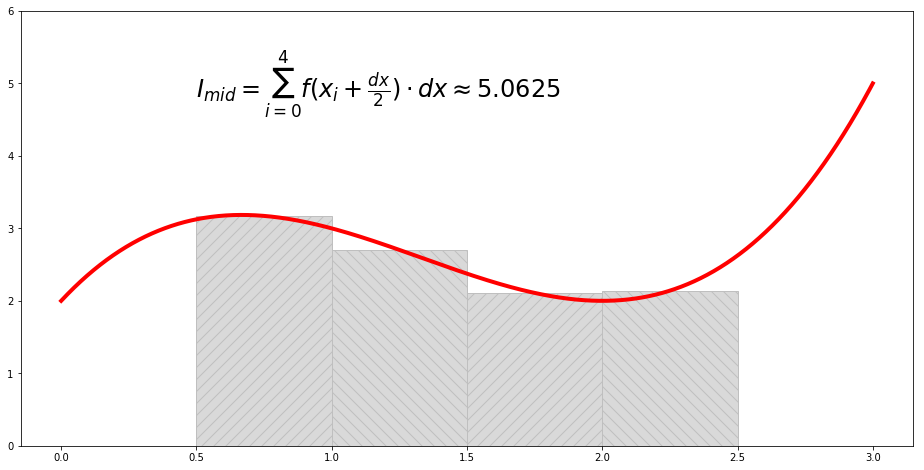

In [9]:
def defInt_middle(f, a, b, N):
    result = 0; FX = []; Xn = []
    dx = abs(b - a)/N
    while a < b:
        result += f(a + dx/2)*dx
        FX += [f(a + dx/2)]
        Xn += [a]
        a += dx
    return result, FX, Xn, dx

N = 4
I_mid, FX, Xn, dx = defInt_middle(f, a, b, N)

fig, ax = plt.subplots()
plt.plot(x, f(x), c='red', linewidth=4)
plt.ylim([0, 6])

for i, [fxi, xi] in enumerate(zip(FX, Xn)):
    verts = [(xi, 0), (xi, fxi), (xi + dx, fxi), (xi + dx, 0)]
    P = Polygon(verts, facecolor='0.85', edgecolor='0.75', hatch=['//', '\\\\'][i % 2])
    ax.add_patch(P)

plt.text(a, 5,
         r'$I_{0}mid{1}=\sum_{0}i=0{1}^{0}{3}{1} f(x_i + \frac{0}dx{1}{0}2{1}) \cdot dx \approx {2:.4f}$'.format('{', '}', I_mid, N),
         horizontalalignment='left',
         verticalalignment='center',
         fontsize=24)
fig.savefig('output/integration_definite-integral_rectangleMiddle.png', bbox_inches='tight')
plt.show()

## 1.2. Trapezoidal rule
---

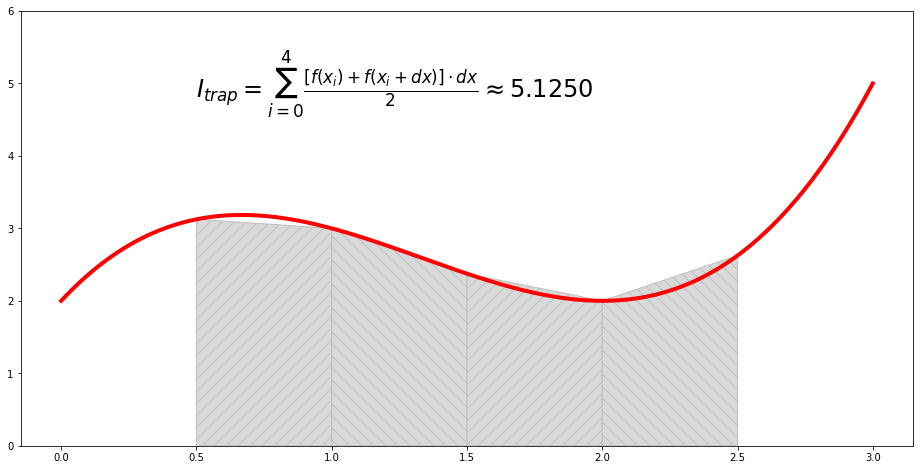

In [10]:
def defInt_trapezoid(f, a, b, N):
    result = 0; FXa, FXb = [], []; Xn = []
    dx = abs(b - a)/N
    while a < b:
        result += (f(a) + f(a + dx))*dx/2
        FXa += [f(a)]; FXb += [f(a + dx)]
        Xn += [a]
        a += dx
    return result, FXa, FXb, Xn, dx

N = 4
I_trap, FXa, FXb, Xn, dx = defInt_trapezoid(f, a, b, N)

fig, ax = plt.subplots()
plt.plot(x, f(x), c='red', linewidth=4)
plt.ylim([0, 6])

for i, [fxai, fxbi, xi] in enumerate(zip(FXa, FXb, Xn)):
    verts = [(xi, 0), (xi, fxai), (xi + dx, fxbi), (xi + dx, 0)]
    P = Polygon(verts, facecolor='0.85', edgecolor='0.75', hatch=['//', '\\\\'][i % 2])
    ax.add_patch(P)

plt.text(a, 5,
         r'$I_{0}trap{1}=\sum_{0}i=0{1}^{0}{3}{1} \frac{0}\left[f(x_i)+f(x_i + dx)\right] \cdot dx{1}{0}2{1}\approx {2:.4f}$'.format('{', '}', I_trap, N),
         horizontalalignment='left',
         verticalalignment='center',
         fontsize=24)
fig.savefig('output/integration_definite-integral_trapezoid.png', bbox_inches='tight')
plt.show()

## 1.3. Comparing to Ground Truth
---

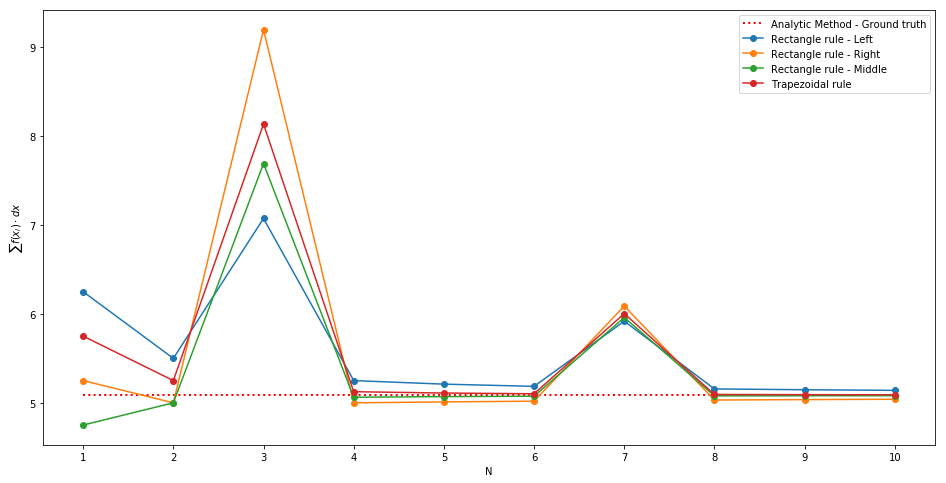

In [11]:
fig, ax = plt.subplots()

Nx = range(1, 11)

plt.plot([Nx[0], Nx[-1]], [I]*2, ':', c='red', linewidth=2, label='Analytic Method - Ground truth')

I1, I2, I3, I4 = [], [], [], []
for Ni in Nx:
    i1, *_ = defInt_left(f, a, b, Ni); I1 += [i1];
    i2, *_ = defInt_right(f, a, b, Ni); I2 += [i2];
    i3, *_ = defInt_middle(f, a, b, Ni); I3 += [i3];
    i4, *_ = defInt_trapezoid(f, a, b, Ni); I4 += [i4];

plt.plot(Nx, I1, marker='o', label='Rectangle rule - Left')
plt.plot(Nx, I2, marker='o', label='Rectangle rule - Right')
plt.plot(Nx, I3, marker='o', label='Rectangle rule - Middle')
plt.plot(Nx, I4, marker='o', label='Trapezoidal rule')

plt.xticks(Nx)
plt.xlabel('N')
plt.ylabel(r'$\sum f(x_i) \cdot dx$')
plt.legend()

fig.savefig('output/integration_definite-integral_groundTruth.png', bbox_inches='tight')
plt.show()